<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [4]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

In [107]:
###Quick data get and preprocessing

!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
    
df = pd.read_csv('loan_train.csv')

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

df['dayofweek'] = df['effective_date'].dt.dayofweek

df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

X = Feature

X= preprocessing.StandardScaler().fit(X).transform(X)

y = df['loan_status'].values

loan_state = {'PAIDOFF':1,'COLLECTION':0}
y1 = np.array(y)
for i in range(len(y1)):
    y1[i] = loan_state[y1[i]]
y1 = y1.astype('int')

--2020-04-23 16:11:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-04-23 16:11:40 (14.3 MB/s) - ‘loan_train.csv’ saved [23101/23101]



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:24: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


Lets download the dataset

In [5]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-04-23 12:58:40--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.001s  

2020-04-23 12:58:40 (16.3 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [6]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [7]:
df.shape

(346, 10)

In [ ]:
#Quick data preprocessing
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

df['dayofweek'] = df['effective_date'].dt.dayofweek

df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

X = Feature

X= preprocessing.StandardScaler().fit(X).transform(X)

y = df['loan_status'].values

loan_state = {'PAIDOFF':1,'COLLECTION':0}
y1 = np.array(y)
for i in range(len(y1)):
    y1[i] = loan_state[y1[i]]
y1 = y1.astype('int')

### Convert to date time object 

In [8]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [9]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [10]:
# notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y

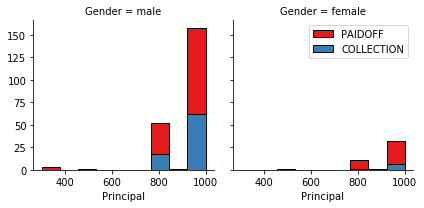

In [11]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

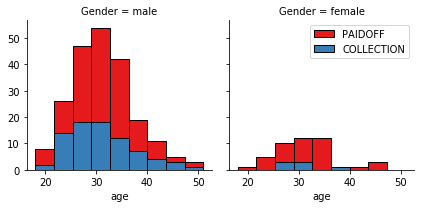

In [12]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [67]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

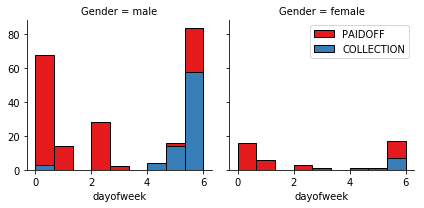

In [13]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [14]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [15]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [16]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [17]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [18]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [19]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [20]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [21]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [32]:
np.unique(y,return_counts = True)

(array(['COLLECTION', 'PAIDOFF'], dtype=object), array([ 86, 260]))

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [23]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(X)
pca.explained_variance_ratio_

array([0.22715198, 0.1950837 , 0.15827926])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [25]:
##Data preparation

#Convert y str to y int for f1-score
loan_state = {'PAIDOFF':1,'COLLECTION':0}
y1 = np.array(y)
for i in range(len(y1)):
    y1[i] = loan_state[y1[i]]
y1 = y1.astype('int')

#Cross-validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state = 1)
list_X_train = list()
list_y_train = list()
list_X_test = list()
list_y_test = list()
for train_ind, test_ind in kf.split(X):
    list_X_train.append(X[train_ind])
    list_X_test.append(X[test_ind])
    list_y_train.append(y1[train_ind])
    list_y_test.append(y1[test_ind])

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages

acc 
       k       acc        f1  f1_TN  f1*f1_TN  f1+f1_TN
99  100  0.751445  0.858086    0.0       0.0  0.858086
77   78  0.751445  0.858086    0.0       0.0  0.858086
74   75  0.751445  0.858086    0.0       0.0  0.858086
73   74  0.751445  0.858086    0.0       0.0  0.858086
72   73  0.751445  0.858086    0.0       0.0  0.858086 


f1 
       k       acc        f1  f1_TN  f1*f1_TN  f1+f1_TN
99  100  0.751445  0.858086    0.0       0.0  0.858086
77   78  0.751445  0.858086    0.0       0.0  0.858086
74   75  0.751445  0.858086    0.0       0.0  0.858086
73   74  0.751445  0.858086    0.0       0.0  0.858086
72   73  0.751445  0.858086    0.0       0.0  0.858086 


f1_TN 
    k       acc        f1     f1_TN  f1*f1_TN  f1+f1_TN
1  2  0.578035  0.690678  0.336364  0.232319  1.027042
3  4  0.615607  0.734531  0.303665  0.223051  1.038196
5  6  0.624277  0.749035  0.252874  0.189411  1.001908
2  3  0.667630  0.786642  0.248366  0.195375  1.035008
6  7  0.679191  0.797075  0.234483  0.18

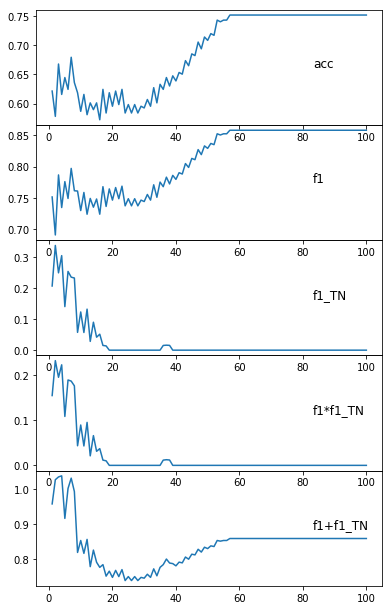

In [27]:
#Tuning of model hyperparameters
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#Build a dataframe for tuning
df_tun = pd.DataFrame(columns = ['k','acc','f1','f1_TN'])
#tuning k
for k in range(1,101):
    y_pred = np.array([],dtype = int)
    y_test = np.array([],dtype = int)
    for fold_k in range(10):
        #Get data of fold k
        X_train_k = list_X_train[fold_k]
        X_test_k = list_X_test[fold_k]
        y_train_k = list_y_train[fold_k]
        y_test_k = list_y_test[fold_k]
        #Modeling
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train_k, y_train_k)
        y_pred_k = knn.predict(X_test_k)
        #Results combination
        y_pred = np.concatenate((y_pred,y_pred_k), axis = 0)
        y_test = np.concatenate((y_test,y_test_k), axis = 0)
    #Model Evaluation
    acc, f1 = accuracy_score(y_test,y_pred),f1_score(y_test,y_pred)
    f1_TN = f1_score(y_test,y_pred,pos_label = 0)
    #adding performance to df tuning
    row = pd.DataFrame([[k,acc,f1,f1_TN]], columns=['k','acc','f1','f1_TN'])
    df_tun = pd.concat([df_tun,row], ignore_index=True)
df_tun['f1*f1_TN'] = df_tun['f1'].mul(df_tun['f1_TN'],axis=0)
df_tun['f1+f1_TN'] = df_tun['f1'] + df_tun['f1_TN']

#Visulization of performance
fig = plt.figure()
ax_list = []
for i in range(5):
    ax = fig.add_axes([0.1, (0.1+0.4*i), 0.8, 0.4])
    ax.plot(df_tun.k,df_tun.iloc[:,-(i+1)])
    ax.text(0.8,0.5,df_tun.columns[-i-1], fontsize=12,transform=ax.transAxes)
    
#Chosen criteria rank
print('acc','\n',df_tun.sort_values(by = ['acc'], ascending = False).head(5), '\n'*2)
print('f1','\n',df_tun.sort_values(by = ['f1'], ascending = False).head(5), '\n'*2)
print('f1_TN','\n',df_tun.sort_values(by = ['f1_TN'], ascending = False).head(5), '\n'*2)
print('f1*f1_TN','\n',df_tun.sort_values(by = ['f1*f1_TN'], ascending = False).head(5), '\n'*2)
print('f1+f1_TN','\n',df_tun.sort_values(by = ['f1+f1_TN'], ascending = False).head(5), '\n'*2)

# k is chosen as 7

# Warnings are because when k is larger than about 60, there is only one unique prediction 1, TN = 0, FN = 0, setting 0 as positive, f1-score cannot be calculated.

In [108]:
#Final model
knn_f = KNeighborsClassifier(n_neighbors = 7)
knn_f.fit(X, y1)
yh = knn_f.predict(X)
accuracy_score(y1,yh)

0.8092485549132948

# Decision Tree

acc 
      k       acc        f1     f1_TN  pred_std  f1*f1_TN  f1+f1_TN
10  13  0.624277  0.748062  0.261364  0.090359  0.195516  1.009426
13  16  0.615607  0.736634  0.288770  0.086769  0.212718  1.025404
8   11  0.615607  0.742747  0.240000  0.096169  0.178259  0.982747
11  14  0.612717  0.735178  0.279570  0.084832  0.205534  1.014748
12  15  0.609827  0.733728  0.270270  0.084277  0.198305  1.003998 


f1 
      k       acc        f1     f1_TN  pred_std  f1*f1_TN  f1+f1_TN
10  13  0.624277  0.748062  0.261364  0.090359  0.195516  1.009426
8   11  0.615607  0.742747  0.240000  0.096169  0.178259  0.982747
13  16  0.615607  0.736634  0.288770  0.086769  0.212718  1.025404
6    9  0.606936  0.736434  0.227273  0.078553  0.167371  0.963707
11  14  0.612717  0.735178  0.279570  0.084832  0.205534  1.014748 


f1_TN 
      k       acc        f1    f1_TN  pred_std  f1*f1_TN  f1+f1_TN
13  16  0.615607  0.736634  0.28877  0.086769  0.212718  1.025404
11  14  0.612717  0.735178  0.27957  0.

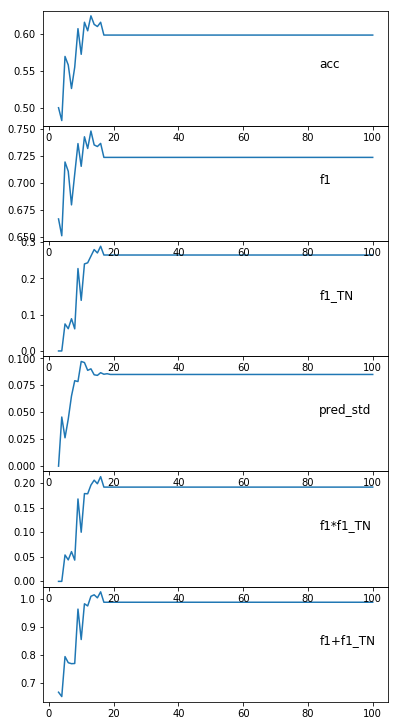

In [40]:
#Tuning of model hyperparameters

from sklearn.tree import DecisionTreeClassifier

#Build a dataframe for tuning
df_tun = pd.DataFrame(columns = ['k','acc','f1','f1_TN','pred_std'])
#tuning k
for k in range(3,101):
    y_pred = np.array([],dtype = int)
    y_test = np.array([],dtype = int)
    y_pred_var = np.array([],dtype = float) #for stability test of the feature choosing randomness
    for fold_k in range(10):
        #Get data of fold k
        X_train_k = list_X_train[fold_k]
        X_test_k = list_X_test[fold_k]
        y_train_k = list_y_train[fold_k]
        y_test_k = list_y_test[fold_k]
        #Modeling
        #random state averaging
        y_pred_k_m = np.zeros((len(y_test_k),20))
        for i in range(20):
            tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = k, random_state = i)
            tree.fit(X_train_k, y_train_k)
            y_pred_k_r = tree.predict(X_test_k)
            y_pred_k_m[:,i] = y_pred_k_r
        #mean prediction of the random states
        y_pred_k_m = y_pred_k_m.astype(float)
        y_pred_k_avg = np.mean(y_pred_k_m, axis=1)
        y_pred_k_var = np.var(y_pred_k_m, axis=1) #for stability test of the feature choosing randomness
        #to most common cases
        y_pred_k = []
        for i in y_pred_k_avg:
            if i >=0.5:
                y_pred_k.append(1)
            else:
                y_pred_k.append(0)
        y_pred_k = np.array(y_pred_k,dtype=int)
        #Results combination
        y_pred = np.concatenate((y_pred,y_pred_k), axis = 0)
        y_test = np.concatenate((y_test,y_test_k), axis = 0)
        y_pred_var = np.concatenate((y_pred_var,y_pred_k_var), axis = 0) #for stability test of the feature choosing randomness
    #Model Evaluation
    acc, f1 = accuracy_score(y_test,y_pred),f1_score(y_test,y_pred)
    f1_TN = f1_score(y_test,y_pred,pos_label = 0)
    pred_var = sum(y_pred_var)/len(y_pred_var) #for stability test of the feature choosing randomness
    pred_std = pred_var ** 0.5
    #adding performance to df tuning
    row = pd.DataFrame([[k,acc,f1,f1_TN,pred_std]], columns=['k','acc','f1','f1_TN','pred_std'])
    df_tun = pd.concat([df_tun,row], ignore_index=True)
df_tun['f1*f1_TN'] = df_tun['f1'].mul(df_tun['f1_TN'],axis=0)
df_tun['f1+f1_TN'] = df_tun['f1'] + df_tun['f1_TN']

#Visulization of performance
fig = plt.figure()
ax_list = []
for i in range(6):
    ax = fig.add_axes([0.1, (0.1+0.4*i), 0.8, 0.4])
    ax.plot(df_tun.k,df_tun.iloc[:,-(i+1)])
    ax.text(0.8,0.5,df_tun.columns[-i-1], fontsize=12,transform=ax.transAxes)
    
#Chosen criteria rank
print('acc','\n',df_tun.sort_values(by = ['acc'], ascending = False).head(5), '\n'*2)
print('f1','\n',df_tun.sort_values(by = ['f1'], ascending = False).head(5), '\n'*2)
print('f1_TN','\n',df_tun.sort_values(by = ['f1_TN'], ascending = False).head(5), '\n'*2)
print('f1*f1_TN','\n',df_tun.sort_values(by = ['f1*f1_TN'], ascending = False).head(5), '\n'*2)
print('f1+f1_TN','\n',df_tun.sort_values(by = ['f1+f1_TN'], ascending = False).head(5), '\n'*2)

# The influence of randomness is acceptable, model not ensembled
# max-depth chosen as 13

In [109]:
#Final model
tree_f = DecisionTreeClassifier(criterion = 'entropy', max_depth = 13, random_state = 0)
tree_f.fit(X, y1)

yh = tree_f.predict(X)
accuracy_score(y1,yh)

0.8872832369942196

# Support Vector Machine

acc 
          k       acc        f1     f1_TN  f1*f1_TN  f1+f1_TN
1     poly  0.679191  0.807626  0.034783  0.028091  0.842408
2      rbf  0.595376  0.746377  0.000000  0.000000  0.746377
0   linear  0.534682  0.696798  0.000000  0.000000  0.696798
3  sigmoid  0.528902  0.691871  0.000000  0.000000  0.691871 


f1 
          k       acc        f1     f1_TN  f1*f1_TN  f1+f1_TN
1     poly  0.679191  0.807626  0.034783  0.028091  0.842408
2      rbf  0.595376  0.746377  0.000000  0.000000  0.746377
0   linear  0.534682  0.696798  0.000000  0.000000  0.696798
3  sigmoid  0.528902  0.691871  0.000000  0.000000  0.691871 


f1_TN 
          k       acc        f1     f1_TN  f1*f1_TN  f1+f1_TN
1     poly  0.679191  0.807626  0.034783  0.028091  0.842408
0   linear  0.534682  0.696798  0.000000  0.000000  0.696798
2      rbf  0.595376  0.746377  0.000000  0.000000  0.746377
3  sigmoid  0.528902  0.691871  0.000000  0.000000  0.691871 


f1*f1_TN 
          k       acc        f1     f1_TN  f1*f

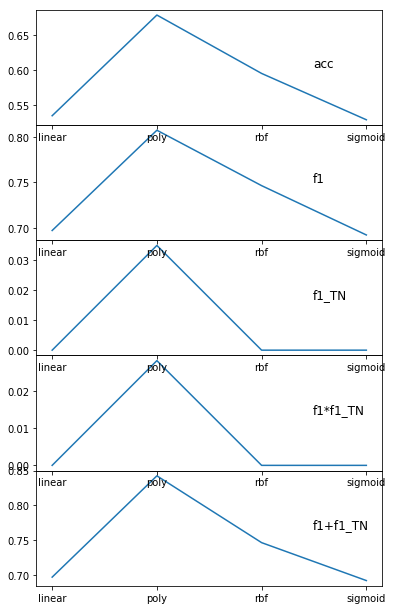

In [48]:
#Model tuning
from sklearn import svm

#Build a dataframe for tuning
df_tun = pd.DataFrame(columns = ['k','acc','f1','f1_TN'])
#tuning k
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernel_list:
    y_pred = np.array([],dtype = int)
    y_test = np.array([],dtype = int)
    for fold_k in range(10):
        #Get data of fold k
        X_train_k = list_X_train[fold_k]
        X_test_k = list_X_test[fold_k]
        y_train_k = list_y_train[fold_k]
        y_test_k = list_y_test[fold_k]
        #Modeling
        sv = svm.SVC(kernel = k,gamma='scale')
        sv.fit(X_train_k, y_train_k)
        y_pred_k = sv.predict(X_test_k)
        #Results combination
        y_pred = np.concatenate((y_pred,y_pred_k), axis = 0)
        y_test = np.concatenate((y_test,y_test_k), axis = 0)
    #Model Evaluation
    acc, f1 = accuracy_score(y_test,y_pred),f1_score(y_test,y_pred)
    f1_TN = f1_score(y_test,y_pred,pos_label = 0)
    #adding performance to df tuning
    row = pd.DataFrame([[k,acc,f1,f1_TN]], columns=['k','acc','f1','f1_TN'])
    df_tun = pd.concat([df_tun,row], ignore_index=True)
df_tun['f1*f1_TN'] = df_tun['f1'].mul(df_tun['f1_TN'],axis=0)
df_tun['f1+f1_TN'] = df_tun['f1'] + df_tun['f1_TN']

#Visulization of performance
fig = plt.figure()
ax_list = []
for i in range(5):
    ax = fig.add_axes([0.1, (0.1+0.4*i), 0.8, 0.4])
    ax.plot(df_tun.k,df_tun.iloc[:,-(i+1)])
    ax.text(0.8,0.5,df_tun.columns[-i-1], fontsize=12,transform=ax.transAxes)
    
#Chosen criteria rank
print('acc','\n',df_tun.sort_values(by = ['acc'], ascending = False).head(5), '\n'*2)
print('f1','\n',df_tun.sort_values(by = ['f1'], ascending = False).head(5), '\n'*2)
print('f1_TN','\n',df_tun.sort_values(by = ['f1_TN'], ascending = False).head(5), '\n'*2)
print('f1*f1_TN','\n',df_tun.sort_values(by = ['f1*f1_TN'], ascending = False).head(5), '\n'*2)
print('f1+f1_TN','\n',df_tun.sort_values(by = ['f1+f1_TN'], ascending = False).head(5), '\n'*2)

# kernel is chosen as 'polynomial'

In [93]:
#Final Model
sv_f = svm.SVC(kernel = 'poly',gamma='scale')
sv_f.fit(X, y1)
yh = sv_f.predict(X)
accuracy_score(y1,yh)

0.7803468208092486

# Logistic Regression

logloss 
        k   logloss       acc        f1  f1_TN      pred_std
14  0.11  0.573745  0.592486  0.744102    0.0  9.969521e-17
15  0.12  0.573767  0.592486  0.744102    0.0  1.066025e-16
13  0.10  0.573789  0.592486  0.744102    0.0  1.046208e-16
16  0.13  0.573835  0.592486  0.744102    0.0  1.099745e-16
12  0.09  0.573925  0.592486  0.744102    0.0  1.037661e-16
17  0.14  0.573937  0.592486  0.744102    0.0  1.116622e-16
18  0.15  0.574064  0.592486  0.744102    0.0  1.118614e-16
11  0.08  0.574197  0.592486  0.744102    0.0  1.052150e-16
19  0.16  0.574208  0.592486  0.744102    0.0  1.106205e-16
20  0.17  0.574366  0.592486  0.744102    0.0  1.125361e-16 


acc 
        k   logloss       acc        f1  f1_TN      pred_std
7   0.04  0.578987  0.595376  0.746377    0.0  9.488941e-17
18  0.15  0.574064  0.592486  0.744102    0.0  1.118614e-16
12  0.09  0.573925  0.592486  0.744102    0.0  1.037661e-16
23  0.20  0.574887  0.592486  0.744102    0.0  1.115824e-16
22  0.19  0.574709  0

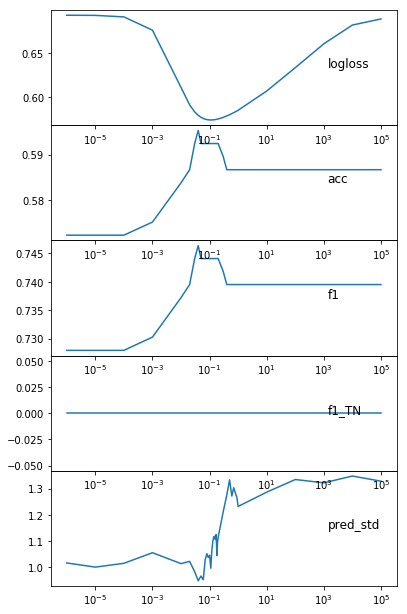

In [91]:
#Tuning of model hyperparameters
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

#Build a dataframe for tuning
df_tun = pd.DataFrame(columns = ['k','logloss','acc','f1','f1_TN','pred_std'])
#tuning k
#create a list of C
C_list = []
for i in range(5): C_list.append(10**(i-6))
for i in range(2,20): C_list.append(0.01*i)
for i in range(2,10): C_list.append(0.1*i)
for i in range(6): C_list.append(10**i)
#Tuning
for k in C_list:
    y_pred = np.array([],dtype = int)
    y_pred_prob = np.array([],dtype = float)
    y_test = np.array([],dtype = int)
    y_pred_var = np.array([],dtype = float) #for stability test of the feature choosing randomness
    for fold_k in range(10):
        #Get data of fold k
        X_train_k = list_X_train[fold_k]
        X_test_k = list_X_test[fold_k]
        y_train_k = list_y_train[fold_k]
        y_test_k = list_y_test[fold_k]
        #Modeling
        #random state averaging
        y_pred_k_m = np.zeros((len(y_test_k),20))
        y_pred_p_k_m = np.zeros((len(y_test_k),20))
        for i in range(20):
            LR = LogisticRegression(C = k, solver = 'liblinear', random_state = i)
            LR.fit(X_train_k, y_train_k)
            y_pred_k_r = LR.predict(X_test_k)
            y_pred_p_k_r = LR.predict_proba(X_test_k)[:,1]
            y_pred_k_m[:,i] = y_pred_k_r
            y_pred_p_k_m[:,i] = y_pred_p_k_r
        #mean prediction of the random states
        y_pred_k_m = y_pred_k_m.astype(float)
        y_pred_k_avg = np.mean(y_pred_k_m, axis=1)
        y_pred_k_p_avg = np.mean(y_pred_p_k_m, axis=1)
        y_pred_k_var = np.var(y_pred_p_k_m, axis=1) #for stability test of the feature choosing randomness
        #to most common cases
        y_pred_k = []
        for i in y_pred_k_avg:
            if i >=0.5:
                y_pred_k.append(1)
            else:
                y_pred_k.append(0)
        y_pred_k = np.array(y_pred_k,dtype=int)
        #Results combination
        y_pred = np.concatenate((y_pred,y_pred_k), axis = 0)
        y_pred_prob = np.concatenate((y_pred_prob,y_pred_k_p_avg), axis = 0)
        y_test = np.concatenate((y_test,y_test_k), axis = 0)
        y_pred_var = np.concatenate((y_pred_var,y_pred_k_var), axis = 0) #for stability test of the feature choosing randomness
    #Model Evaluation
    logloss = log_loss(y_test,y_pred_prob)
    acc, f1 = accuracy_score(y_test,y_pred),f1_score(y_test,y_pred)
    f1_TN = f1_score(y_test,y_pred,pos_label = 0)
    pred_var = sum(y_pred_var)/len(y_pred_var) #for stability test of the feature choosing randomness
    pred_std = pred_var ** 0.5
    #adding performance to df tuning
    row = pd.DataFrame([[k,logloss,acc,f1,f1_TN,pred_std]], columns=['k','logloss','acc','f1','f1_TN','pred_std'])
    df_tun = pd.concat([df_tun,row], ignore_index=True)

#Visulization of performance
fig = plt.figure()
ax_list = []
for i in range(5):
    ax = fig.add_axes([0.1, (0.1+0.4*i), 0.8, 0.4])
    ax.plot(df_tun.k,df_tun.iloc[:,-(i+1)])
    ax.set_xscale('log')
    ax.text(0.8,0.5,df_tun.columns[-i-1], fontsize=12,transform=ax.transAxes)
    
#Chosen criteria rank
print('logloss','\n',df_tun.sort_values(by = ['logloss'], ascending = True).head(10), '\n'*2)
print('acc','\n',df_tun.sort_values(by = ['acc'], ascending = False).head(5), '\n'*2)
print('f1','\n',df_tun.sort_values(by = ['f1'], ascending = False).head(5), '\n'*2)
print('f1_TN','\n',df_tun.sort_values(by = ['f1_TN'], ascending = False).head(5), '\n'*2)
print('pred_std','\n',df_tun.sort_values(by = ['pred_std'], ascending = True).head(5), '\n'*2)

# the influence of random state can be ignored
# the inverse of regularization strength is chosen as 0.09

In [92]:
#Final Model
LR_f = LogisticRegression(C = 0.09, solver = 'liblinear', random_state = 0)
LR_f.fit(X, y1)
yh_prob = LR_f.predict_proba(X)[:,1]
log_loss(y1,yh_prob)


0.4521101016254488

# Model Evaluation using Test set

In [100]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [110]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-04-23 16:12:19--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-04-23 16:12:20 (248 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [111]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [112]:
#Data processing
df = test_df

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

df['dayofweek'] = df['effective_date'].dt.dayofweek

df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

X_out = Feature

X_out = preprocessing.StandardScaler().fit(X_out).transform(X_out)

y_out = df['loan_status'].values

loan_state = {'PAIDOFF':1,'COLLECTION':0}
y1_out = np.array(y_out)
for i in range(len(y1_out)):
    y1_out[i] = loan_state[y1_out[i]]
y1_out = y1_out.astype('int')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:21: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


In [117]:
#Testing
metrics = []

yh = knn_f.predict(X_out)
row_metrics = [jaccard_similarity_score(y1_out,yh),f1_score(y1_out,yh),f1_score(y1_out,yh,pos_label=0),'NA']
metrics.append(row_metrics)
yh = tree_f.predict(X_out)
row_metrics = [jaccard_similarity_score(y1_out,yh),f1_score(y1_out,yh),f1_score(y1_out,yh,pos_label=0),'NA']
metrics.append(row_metrics)
yh = sv_f.predict(X_out)
row_metrics = [jaccard_similarity_score(y1_out,yh),f1_score(y1_out,yh),f1_score(y1_out,yh,pos_label=0),'NA']
metrics.append(row_metrics)
yh = LR_f.predict(X_out)
yh_prob = LR_f.predict_proba(X_out)[:,1]
row_metrics = [jaccard_similarity_score(y1_out,yh),f1_score(y1_out,yh),f1_score(y1_out,yh,pos_label=0),log_loss(y1_out,yh_prob)]
metrics.append(row_metrics)

df_ModelEvaluation = pd.DataFrame(metrics)
df_ModelEvaluation.index = ['KNN','Decision Tree','SVM','LogisticRegression']
df_ModelEvaluation = df_ModelEvaluation.reset_index()
df_ModelEvaluation.columns = ['Algorithm','Jaccard','F1-score_PaidOff','F1-score_Collection','LogLoss']

df_ModelEvaluation

#F1_score_PaidOff is the F1_score when paid off is set as positive, F1_score_Collection is the F1_score when Collection is set as positive

,Algorithm,Jaccard,F1-score_PaidOff,F1-score_Collection,LogLoss
0,KNN,0.722222,0.823529,0.347826,NA
1,Decision Tree,0.685185,0.784810,0.413793,NA
2,SVM,0.740741,0.844444,0.222222,NA
3,LogisticRegression,0.759259,0.860215,0.133333,0.481212


In [118]:
#Testing
metrics = []

yh = knn_f.predict(X_out)
row_metrics = [jaccard_similarity_score(y1_out,yh),f1_score(y1_out,yh),'NA']
metrics.append(row_metrics)
yh = tree_f.predict(X_out)
row_metrics = [jaccard_similarity_score(y1_out,yh),f1_score(y1_out,yh),'NA']
metrics.append(row_metrics)
yh = sv_f.predict(X_out)
row_metrics = [jaccard_similarity_score(y1_out,yh),f1_score(y1_out,yh),'NA']
metrics.append(row_metrics)
yh = LR_f.predict(X_out)
yh_prob = LR_f.predict_proba(X_out)[:,1]
row_metrics = [jaccard_similarity_score(y1_out,yh),f1_score(y1_out,yh),log_loss(y1_out,yh_prob)]
metrics.append(row_metrics)

df_ModelEvaluation = pd.DataFrame(metrics)
df_ModelEvaluation.index = ['KNN','Decision Tree','SVM','LogisticRegression']
df_ModelEvaluation = df_ModelEvaluation.reset_index()
df_ModelEvaluation.columns = ['Algorithm','Jaccard','F1-score','LogLoss']

df_ModelEvaluation

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.722222,0.823529,NA
1,Decision Tree,0.685185,0.784810,NA
2,SVM,0.740741,0.844444,NA
3,LogisticRegression,0.759259,0.860215,0.481212


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>